# <font color=navy>Capstone Project: Tips per Pass</font>

### <font color=navy>The Story of the Social Impacts # of Passengers has on Tips for Yellow Taxis in New York City, January 2018</font>
#### <font color=navy>By Armon Asgari</font>

Github: https://github.com/armonasgari/Projects.git


# <font color=orange>Data Summary and Citation</font>
Data came from:

NYC Taxi and Limousine Commission (TLC). (2018). Trip Sheet Data (CSV Format) 2018 January Yellow [Data File]. Available from NYC Taxi and Limousine Commission (TLC) site: http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml

This Capstone project will automatically pull the data from the website. If you wish to Download the data locally, navigate to __"Trip Sheet Data (CSV Format)" > "2018" > "January" > "Yellow"__:
https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv

This Data was accompanied by a Data Dictionary which explained what each column and its variables mean. The following is the citation and the link to the Data Dictionary:

NYC Taxi and Limousine Commission (TLC). (2018). Data Dictionary – Yellow Taxi Trip Records [PDF file]. Retrieved from https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv


***
# <font color=orange>1. Data Extraction</font>
The reason January 2018 data was chosen is because the weather conditions in New York City during January are both very cold and often times very snowy, which translates to more cab rides than would otherwise be taken in lieu of walking during better weather conditions.

The reason __only__ January 2018 was chosen was because there was 8.75 million rides given in January 2018 alone before the data has been cleaned and filtered. Using a full years worth of data would be better in a sense that it would account for differences in weather, overall moods of the population during certain months, and other biasies depending on time of year. We will move forward with the analyis knowing this is a weakness.

The data also contained a Dictionary which explained the columns and the data they contained. The Dictionary of Data for Yellow Cabs is as follows:
http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

Brief descriptions of columns are as follows:
- __VendorID__ - This tells us what Taxi Fare Payment System was used, either Creative Mobile Technologies or VeriFone Inc.. <font color=red>Either way the data is not relevant to our needs with this analysis and the column will be deleted</font>
- __tpep_pickup_datetime__ - Date and time of customer pickup
- __tpep_dropoff_datetime__ - Date and time the same customer was dropped off
- __passenger_count__ - Number of passengers per taxi ride; this information is very relevant to our test. <font color=red>There are some rows of passenger_count data that has the value 0. We will remove these values since at least 1 passenger is needed to pay a taxi fare</font>
- __trip_distance__ - Distance traveled provided by taximeter, in miles; relevant for calculating the fare cost.
- __PULocationID__ - Location of taxi pickup
- __DOLocationID__ - Location of taxi dropoff
- __RateCodeID__ - This code indicated if the fare was a Standard Fare, an Airport Fare, a "Nassau or Westchester" Fare, Negotiated Fare, or Group Fare. <font color=red>In this case we will only use Standard Fare (Standard Fare = 1) to remove unknown/biased variables.</font>
- __Store_and_fwd_flag__ - If a taxi was having issues connecting to server, the fare would be logged as a "Store and Forward" meaning it would store the payment and fare information until it connected to the server again to tramsmit the data. <font color=red>For this part we will remove all of the "Yes" values as part of the data cleaning incase there are issues with the data that was collected, and then after removing the effected rows, we will delete the column because we so not need to information.</font>
- __Payment_type__ - Whether Credit Card, Cash, No Charge, Dispute, Unknown or Voided charges were used as payment for each ride. <font color=red>This section will be cleaned by deleting all rows besides Credit Card because only Credit Cards display tip amounts in the Tip_amount columns.</font>
- __Fare_amount__ - Base fare amount without taxes, surcharges, and tips included
- __Extra__ - any additional surcharges
- __MTA_tax__ - \\$0.50 tax paid on every fare
- __Improvement_surcharge__ - \\$0.30 improvement surcharge, added to every fare.
- __Tip_amount__ - Amount of money tiped per ride. Only recorded if Credit Card was used.
- __Tolls_amount__ - Toll charges if any toll roads were used.
- __Total_amount__ - Total fare including base fare, tax, surcharges, and tips


### In this Capstone Project, the question we will be trying to answer is:
#### Is the amount of money tipped by taxi customers effected by the amount of passengers in the taxi?
The goal is to see if there is a social impact of whether or not a single customer tips as much or as frequently as if a person is riding with others.

## $\mu$0 : Increasing passenger count has no effect on tip amount
## $\mu$1 : Increasing passenger count has a positive effect on tip amount

In [1]:
import pandas as pd

df = pd.read_table('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv', sep=',', header = 0)

#the following commented lines were used for personal testing during this Project.
#IF you would like to save the data locally instead of pulling from web, follow the link above
#to the download the data and put your download path in line 9 below.

#df = pd.read_csv("/Users/armon777/Desktop/yellow_tripdata_2018-01.csv", sep=',', header=0)


#df = pd.read_csv("/Users/armon777/Desktop/Test1.csv", sep=',', header=0)

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


After importing the Data from the website, we run the df.head() command to see what the columns are within the dataset, and types of data. Now we will see how many columns we have by using the df.tail() command.

In [2]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8759869,1,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,N,158,163,1,12.0,0.5,0.5,2.65,0.0,0.3,15.95
8759870,1,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,N,163,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
8759871,2,2018-01-31 23:28:00,2018-01-31 23:37:09,1,2.95,1,N,74,69,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80
8759872,2,2018-01-31 23:24:40,2018-01-31 23:25:28,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00
8759873,2,2018-01-31 23:28:16,2018-01-31 23:28:38,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00


***

# <font color=orange>2. Data Cleaning</font>
### <font color=red>Remove VendorID Column</font>

The data for the most part is clean, there are no null or n/a values to worry about. We will do further cleaning to cut down on the size of the data to save time when we run the analysis since the the dataset is so big.

We will first start by deleting the first column __VendorID__ since that data is not relevant.

In [3]:
df = df.drop(['VendorID'], axis=1)

#df.head(10)

### <font color=red>Remove All Types of Fares Besides Standard Fares</font>
We will remove Airport Fares, Nassau or Westchester Fares, Negotiated Fares, and Group Fares, leaving only Standard Fares for this analysis.
<br> __(Standard Fare = 1)__

In [4]:
#Before
df['RatecodeID'].value_counts()

1     8532501
2      179261
5       27730
3       15127
4        5080
99        106
6          69
Name: RatecodeID, dtype: int64

In [5]:
#After
df = df[df.RatecodeID == 1]
df['RatecodeID'].value_counts()

1    8532501
Name: RatecodeID, dtype: int64

### <font color=red>Remove "Yes" from Store and Forward payments and Delete Column</font>
Removing "Yes" from Store and Forward payments so the coresponding rows are not included in the data we analyse. The reason is they could have potential issues with accuratcy since they are a result of a system server failure.

After removing the "Yes" values, we will delete the column because the column is no longer needed.
<br> __(Store and Forward != Y)__

In [6]:
#Before
df['store_and_fwd_flag'].value_counts()

N    8502693
Y      29808
Name: store_and_fwd_flag, dtype: int64

In [7]:
#After
df = df[df.store_and_fwd_flag != 'Y']
df['store_and_fwd_flag'].value_counts()

N    8502693
Name: store_and_fwd_flag, dtype: int64

In [8]:
#Deleting Column
df = df.drop(['store_and_fwd_flag'], axis=1)
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


### <font color=red>Remove All Payment Types Besides Credit Card</font>
Since Credit Card is the only way Tips were able to be recorded in this data, we must remove the other payment types (Cash, No Charge, Dispute, Unknown or Voided) since the other payment types will not have the required data we need.

We will keep Credit Cards
<br> __(Credit Cards = 1)__


In [9]:
#Before
df['payment_type'].value_counts()

1    5915730
2    2536829
3      39210
4      10924
Name: payment_type, dtype: int64

In [10]:
#After
df = df[df.payment_type == 1]
df['payment_type'].value_counts()

1    5915730
Name: payment_type, dtype: int64

### <font color=red>Remove Passenger Count 0</font>
There are some rows of passenger_count data that has the value 0. We will remove these values since at least 1 passenger is needed to pay a taxi fare.
<br> __(passenger_count != 0)__
<br> There are also 2 rides with 7 passengers and 2 rides with 9 passengers. since the sample size of those quantities is so small, we will remove them as well.
<br> __(passenger_count != 7)__
<br> __(passenger_count != 9)__

In [11]:
#Before
df['passenger_count'].value_counts()

1    4255821
2     837847
5     282578
3     229907
6     169519
4     100539
0      39515
9          2
7          2
Name: passenger_count, dtype: int64

In [12]:
#After
df = df[df.passenger_count != 0]
df = df[df.passenger_count != 7]
df = df[df.passenger_count != 9]
df['passenger_count'].value_counts()

1    4255821
2     837847
5     282578
3     229907
6     169519
4     100539
Name: passenger_count, dtype: int64

In [13]:
df.tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8759860,2018-01-31 23:54:57,2018-02-01 00:29:56,1,13.90,1,186,16,1,42.0,0.5,0.5,15.00,5.76,0.3,64.06
8759866,2018-01-31 23:52:53,2018-01-31 23:57:32,1,1.20,1,43,162,1,6.0,0.5,0.5,1.50,0.00,0.3,8.80
8759867,2018-01-31 23:20:51,2018-01-31 23:30:51,1,1.65,1,234,158,1,8.5,0.5,0.5,2.45,0.00,0.3,12.25
8759869,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,158,163,1,12.0,0.5,0.5,2.65,0.00,0.3,15.95
8759870,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,163,162,1,4.5,0.5,0.5,1.15,0.00,0.3,6.95


### <font color=red>Remove Outliers for Tips</font>
Next, we will attempt to remove outliers. with the following code

In [14]:
df['tip_amount'].describe()
#As seen below, the 3rd quartile is much MUCH smaller than the Max, additional cleanup likely necessay for outliers

count    5.876211e+06
mean     2.381514e+00
std      2.020495e+00
min      0.000000e+00
25%      1.260000e+00
50%      1.950000e+00
75%      2.800000e+00
max      4.417100e+02
Name: tip_amount, dtype: float64

As seen above, the 3rd quartile for all of the tip amounts starts at \$2.80 but the maximum tip amount was \$66. This means there are definitely outliers.

For this Capstone, 

### <font color=red>Reindex</font>
Reindexing to make it nicer

In [15]:
#reindexing
df = df.reset_index(drop=True)
#number of rows
print("number of rows = " + str(df.shape[0]))
df.tail()

number of rows = 5876211


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
5876206,2018-01-31 23:54:57,2018-02-01 00:29:56,1,13.90,1,186,16,1,42.0,0.5,0.5,15.00,5.76,0.3,64.06
5876207,2018-01-31 23:52:53,2018-01-31 23:57:32,1,1.20,1,43,162,1,6.0,0.5,0.5,1.50,0.00,0.3,8.80
5876208,2018-01-31 23:20:51,2018-01-31 23:30:51,1,1.65,1,234,158,1,8.5,0.5,0.5,2.45,0.00,0.3,12.25
5876209,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,158,163,1,12.0,0.5,0.5,2.65,0.00,0.3,15.95
5876210,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,163,162,1,4.5,0.5,0.5,1.15,0.00,0.3,6.95


## <font color=green>Our Data is Now Clean and Optimized For Vizualization and Analysis!</font>
***

# <font color=orange>3. Data Vizualization</font>

In [16]:
import matplotlib.pyplot as plt

a = df.loc[df['passenger_count'] == 1,:]
b = df.loc[df['passenger_count'] == 2,:]
c = df.loc[df['passenger_count'] == 3,:]
d = df.loc[df['passenger_count'] == 4,:]
e = df.loc[df['passenger_count'] == 5,:]
f = df.loc[df['passenger_count'] == 6,:]

## <font color=red>BoxPlot of Tip Amounts per Passenger Count </font>
Boxplot of Passenger Count and Tip Amount shows how many Outliers there are in this dataset.

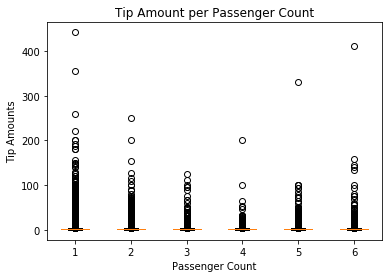

count    5.876211e+06
mean     2.381514e+00
std      2.020495e+00
min      0.000000e+00
25%      1.260000e+00
50%      1.950000e+00
75%      2.800000e+00
max      4.417100e+02
Name: tip_amount, dtype: float64


In [17]:
passtipbox = [a['tip_amount'], b['tip_amount'], c['tip_amount'], d['tip_amount'], e['tip_amount'], f['tip_amount']]
plt.boxplot(passtipbox)
plt.gca().set_xticklabels(['1', '2', '3', '4', '5', '6'])
plt.xlabel('Passenger Count')
plt.ylabel('Tip Amounts')
plt.title('Tip Amount per Passenger Count')
plt.show()
print(df['tip_amount'].describe())

Already, we see that 4 passenger count has less tip amounts than the rest of the passener counts.

## <font color=red>Removing Outliers </font>

As we saw above, there are too many outliers that will heavily skew the data. In the next step we will cut down the skewed data by capping the max tip amount in our dataset to $10

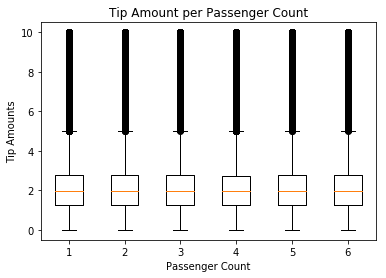

count    5.825688e+06
mean     2.290362e+00
std      1.621761e+00
min      0.000000e+00
25%      1.260000e+00
50%      1.950000e+00
75%      2.760000e+00
max      1.000000e+01
Name: tip_amount, dtype: float64


In [18]:
#Max Tip amount set to $10
df_out = df[df.tip_amount <= 10]
df_out = df_out.reset_index(drop=True)

a = df_out.loc[df['passenger_count'] == 1,:]
b = df_out.loc[df['passenger_count'] == 2,:]
c = df_out.loc[df['passenger_count'] == 3,:]
d = df_out.loc[df['passenger_count'] == 4,:]
e = df_out.loc[df['passenger_count'] == 5,:]
f = df_out.loc[df['passenger_count'] == 6,:]




passtipbox = [a['tip_amount'], b['tip_amount'], c['tip_amount'], d['tip_amount'], e['tip_amount'], f['tip_amount']]
plt.boxplot(passtipbox)
plt.gca().set_xticklabels(['1', '2', '3', '4', '5', '6'])
plt.xlabel('Passenger Count')
plt.ylabel('Tip Amounts')
plt.title('Tip Amount per Passenger Count')
plt.show()
print(df_out['tip_amount'].describe())

## <font color=red>Distribution of Dollars Tipped </font>

The following is a histogram that shows us the distribution of amount tipped is skewed to the Left with the majority of tips being $1

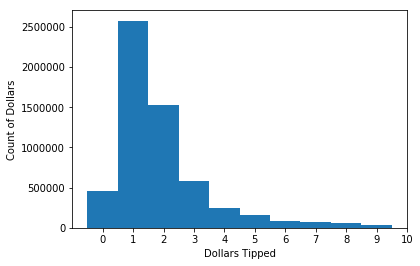

In [19]:
t_hist = df_out['tip_amount']

plt.hist(t_hist, 10, align='left')
plt.xticks(range(11))
plt.xlabel('Dollars Tipped')
plt.ylabel('Count of Dollars')
plt.show()



To make this graph more meaningful, we will change the Y Axis to percentage with the following:

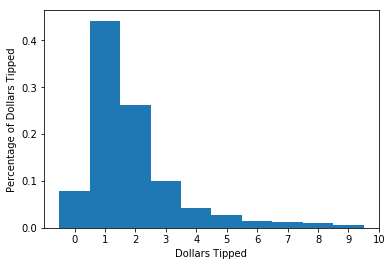

In [20]:
t_hist = df_out['tip_amount']

plt.hist(t_hist, 10, align='left', density=True)
plt.xticks(range(11))
plt.xlabel('Dollars Tipped')
plt.ylabel('Percentage of Dollars Tipped')
plt.show()

## <font color=red>Bar Plot - Instances of Passenger Count, Per Ride </font>
Count of Passenger Counts

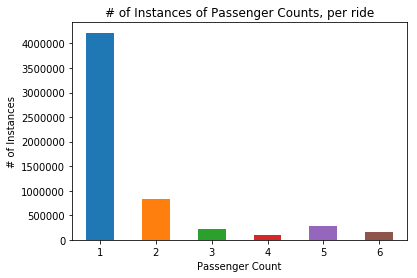

1    4219652
2     830721
3     227892
4      99647
5     279815
6     167961
Name: passenger_count, dtype: int64


In [21]:
abc = pd.value_counts(df_out['passenger_count'].values)
abcplot = abc.sort_index().plot.bar(title="# of Instances of Passenger Counts, per ride", rot=0)
abcplot.set_xlabel("Passenger Count")
abcplot.set_ylabel("# of Instances")
plt.show()
print(df_out['passenger_count'].value_counts().sort_index())

## <font color=red>Mean Tip amount per passenger count </font>
Average amount of Tip paid per Number of Passengers

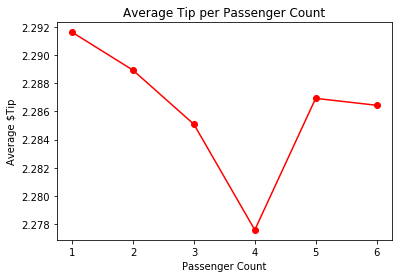

In [22]:
a_mean = a['tip_amount'].mean()
b_mean = b['tip_amount'].mean()
c_mean = c['tip_amount'].mean()
d_mean = d['tip_amount'].mean()
e_mean = e['tip_amount'].mean()
f_mean = f['tip_amount'].mean()
plt.plot(['1', '2', '3', '4', '5', '6'], [a_mean, b_mean, c_mean, d_mean, e_mean, f_mean] , 'ro-')
plt.xlabel('Passenger Count')
plt.ylabel('Average $Tip')
plt.title('Average Tip per Passenger Count')
plt.show()

# <font color=orange>4. Predictive Analysis</font>

## <font color=red>Linear Regression, Without Outliers</font>
For the Predictive Analysis, we will run a regression on our dependant variable (tip_amount) and our independent variable (passenger_count)

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
#our dependent variable is "tip_amount"
#our independent variable is "passenger_count"

model = smf.OLS.from_formula('tip_amount ~ passenger_count', data = df_out)
results = model.fit()
print(results.params)

Intercept          2.283111
passenger_count    0.004508
dtype: float64


In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     70.76
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           4.04e-17
Time:                        04:03:08   Log-Likelihood:            -1.1083e+07
No. Observations:             5825688   AIC:                         2.217e+07
Df Residuals:                 5825686   BIC:                         2.217e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.2831      0.001   20

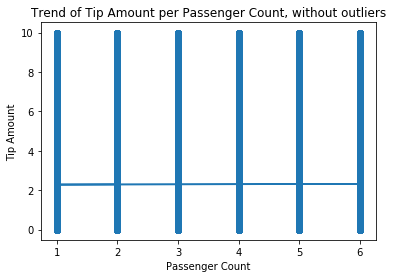

In [26]:
plt.scatter(df_out.passenger_count, df_out.tip_amount)
plt.plot(df_out.passenger_count, results.fittedvalues)
plt.xlabel('Passenger Count')
plt.ylabel('Tip Amount')
plt.title('Trend of Tip Amount per Passenger Count, without outliers')
plt.show()

## <font color=red>Regression Results </font>
As we see above in the summary as well as the graph, our final equation for the regression line is:

Y = 2.283111 + 0.004508 * B1

With a p-value of 0.000, we can reject the null hypothesis and assume that for each additional person in the passenger_count, there is an average increase in tip by $0.0045

Unfortunatly our Adjusted R$^2$ is also at 0\% which means tells us 0\% of the story and must be significantly improved by adding more significant variables. This also makes sense since the tip amount that goes up per passenger increase is less than 1 cent.

## <font color=red>For Fun, Lets Run a Regression __WITH__ The Outliers </font>

In [27]:
#our dependent variable is "tip_amount"
#our independent variable is "passenger_count"

model = smf.OLS.from_formula('tip_amount ~ passenger_count', data = df)
results = model.fit()
print(results.params)

Intercept          2.370651
passenger_count    0.006752
dtype: float64


In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           2.97e-24
Time:                        04:03:43   Log-Likelihood:            -1.2471e+07
No. Observations:             5876211   AIC:                         2.494e+07
Df Residuals:                 5876209   BIC:                         2.494e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.3707      0.001   17

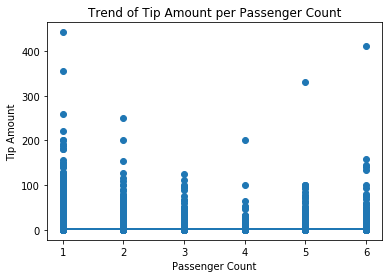

In [29]:
plt.scatter(df.passenger_count, df.tip_amount)
plt.plot(df.passenger_count, results.fittedvalues)
plt.xlabel('Passenger Count')
plt.ylabel('Tip Amount')
plt.title('Trend of Tip Amount per Passenger Count')
plt.show()

As we see above in the summary as well as the graph WITH Outliers, our final equation for the regression line is:

Y = 2.370651 + 0.006752 * B1

We still have a p-value of 0.000, so we still can reject the null hypothesis and assume that for each additional person in the passenger_count, there is an average increase in tip by $0.0068

Unfortunatly our Adjusted R$^2$ is still at 0\% which means tells us 0\% of the story is told by our variables and to significantly improved our Adjusted R$^2$, we need to add more significant variables. This also makes sense since the tip amount that goes up per passenger increase is still less than 1 cent.